In [1]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *
from gui.models import get_ci

sns.timeseries.algo.bootstrap = my_bootstrap
sns.categorical.bootstrap = my_bootstrap

/Users/miroslavbatchkarov/NetBeansProjects/ExpLosion


In [2]:
d = {'labelled': 'reuters21578/r8-tagged-grouped',
    'expansions__noise': 0,
     'expansions__vectors__composer': 'Add',
     'expansions__vectors__rep': 0, 
    'expansions__vectors__avg':0,
     'expansions__vectors__unlabelled_percentage': 100}

In [3]:
ids = Experiment.objects.filter(**d).values_list('id', flat=True)
print('experiments are', ids, len(ids))
df = dataframe_from_exp_ids(ids, {'id':'id',
                                    'unlab':'expansions__vectors__unlabelled',
                                 'algo':'expansions__vectors__algorithm',
                                 'k':'expansions__k'}, abbreviate=False)

experiments are [135, 392, 403, 414, 415, 416, 417, 418, 419, 420] 10
algo has 5000 values
folds has 5000 values
id has 5000 values
k has 5000 values
unlab has 5000 values
Accuracy has 5000 values


In [4]:
performance_table(df)

keeping {'algo', 'k', 'unlab'}


mean  ci_width
algo               k  unlab                     
count_dependencies 3  gigaw  64.153577  3.495008
                      wiki   61.465959  3.677786
count_windows      3  gigaw  71.938194  3.168837
                      wiki   66.948773  3.719709
glove              3  wiki   61.848222  2.969950
word2vec           3  cwiki  64.885893  3.370298
                      gigaw  74.164143  2.981941
                      wiki   68.037037  3.223113
                   30 wiki   59.471400  2.998158
                   60 wiki   56.984646  3.127234

# Results

Error bounds quite wide still, but:

 - wiki $<$ gigaw consistently
 - glove $\approx$ deps $<$ w2v $\approx$ wins
 - increasing $k$ drops performance (faster than in Amazon)
 - noise eval with a higher $k$ looks right even on an R2 (other notebook)

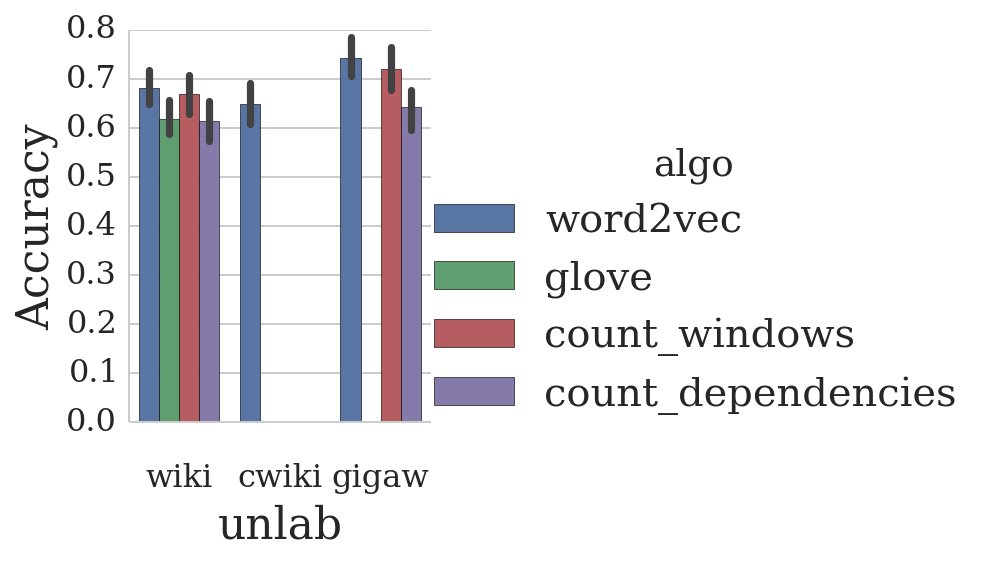

In [5]:
sns.factorplot(data=df[df.k=='3'], y='Accuracy', x='unlab', hue='algo',
               ci=100, kind='bar');

In [6]:
sign_df = get_demsar_params(ids, ['expansions__vectors__unlabelled', 
                                  'expansions__vectors__algorithm', 
                                  'expansions__k'])[0]
sign_df[(sign_df.significant==True)&(sign_df.name2=='gigaw-w2v-3')].sort('mean_diff')

,name1,acc1,name2,acc2,mean_diff,pval,significant
6,wiki-w2v-3,0.680912,gigaw-w2v-3,0.741514,0.060603,0,True
32,wiki-W-3,0.669479,gigaw-w2v-3,0.741514,0.072036,0,True
39,cwiki-w2v-3,0.648903,gigaw-w2v-3,0.741514,0.092612,0,True
27,wiki-glove-3,0.618065,gigaw-w2v-3,0.741514,0.123449,0,True
36,wiki-D-3,0.615618,gigaw-w2v-3,0.741514,0.125896,0,True
14,wiki-w2v-30,0.594776,gigaw-w2v-3,0.741514,0.146739,0,True
21,wiki-w2v-60,0.569159,gigaw-w2v-3,0.741514,0.172355,0,True


In [7]:
for i in ids:
    cv_score = Results.objects.get(id=i, classifier=CLASSIFIER).accuracy_mean
    bs_score = get_ci(i)[0]
    print((cv_score - bs_score)*100)

0.0541310541311
0.00616208975218
-0.0686962276638
-0.0416785206259
-0.000920245398772
0.0958301743745
0.00438871473355
-0.0127067014795
0.0236111111111
-0.0104825291181
